In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from operator import add
import math, time
import operator
import csv
rnd = np.random

# n = 20
# square = 10
# xc = rnd.rand(n)*square                                                   #randomly generate points
# yc = rnd.rand(n)*square

# coordinate = {'X':[i for i in xc],
#               'Y':[k for k in yc]}


n = 100
square = 100
xc = list(rnd.rand(n)*square)      #生成0-1再乘100 #randomly generate points
yc = list(rnd.rand(n)*square)
coordinates = [(xc[i], yc[i]) for i in range(len(xc))]

while len(set(coordinates)) != n:
    xc = list(rnd.rand(n)*square)      #randomly generate points
    yc = list(rnd.rand(n)*square)
    coordinates = [(xc[i], yc[i]) for i in range(len(xc))]
    
df = pd.DataFrame(coordinates, columns= ['X', 'Y'])
df.to_csv ('export_distance.csv', index = False, header=True)             # saving the X & Y in a file
df = pd.read_csv('export_distance.csv')                                   # call the file
df = df[['X','Y']]
# points = np.array(df.values.tolist())
points = df.values.tolist()   #[[x1,y1],[x2,y2],....]
#print(points)
maps = []
# calculate distance between each two points
for i in range(len(points)):
    for j in range(len(points)):
        distance = math.sqrt((points[i][0]-points[j][0])**2+(points[i][1]-points[j][1])**2)
        maps.append(distance)
# print(maps)
# print(len(maps))
# reshape to distance matrix
maps_matrix = np.reshape(maps, (len(points), len(points)))
print(maps_matrix)

[[ 0.         19.21382711 65.37067993 ... 20.34777358 11.27120433
  66.01696943]
 [19.21382711  0.         46.40706694 ... 37.89730028  9.32829065
  49.47060793]
 [65.37067993 46.40706694  0.         ... 81.79436175 54.36513087
  20.80872087]
 ...
 [20.34777358 37.89730028 81.79436175 ...  0.         28.64026614
  78.36403008]
 [11.27120433  9.32829065 54.36513087 ... 28.64026614  0.
  54.84319933]
 [66.01696943 49.47060793 20.80872087 ... 78.36403008 54.84319933
   0.        ]]


Objective: 80497
Route for vehicle 0:
 0 ->  68 ->  7 ->  4 ->  34 ->  11 ->  97 ->  27 ->  79 ->  26 ->  63 ->  39 ->  53 ->  86 ->  18 ->  25 ->  52 ->  24 ->  23 ->  73 ->  77 ->  40 ->  69 ->  56 ->  64 ->  80 ->  45 ->  49 ->  20 ->  65 ->  61 ->  16 ->  46 ->  90 ->  43 ->  84 ->  36 ->  91 ->  37 ->  41 ->  19 ->  8 ->  93 ->  29 ->  50 ->  5 ->  76 ->  99 ->  81 ->  44 ->  74 ->  10 ->  2 ->  66 ->  54 ->  28 ->  12 ->  32 ->  9 ->  35 ->  21 ->  38 ->  87 ->  88 ->  78 ->  95 ->  51 ->  22 ->  89 ->  82 ->  92 ->  58 ->  33 ->  59 ->  72 ->  3 ->  67 ->  85 ->  13 ->  96 ->  75 ->  94 ->  62 ->  57 ->  42 ->  6 ->  55 ->  48 ->  1 ->  98 ->  60 ->  15 ->  30 ->  14 ->  47 ->  17 ->  71 ->  31 ->  70 ->  83 -> 0
Distance of the route: 797m

The shortest route distances: 797m
ROAD MAP SOLUTION


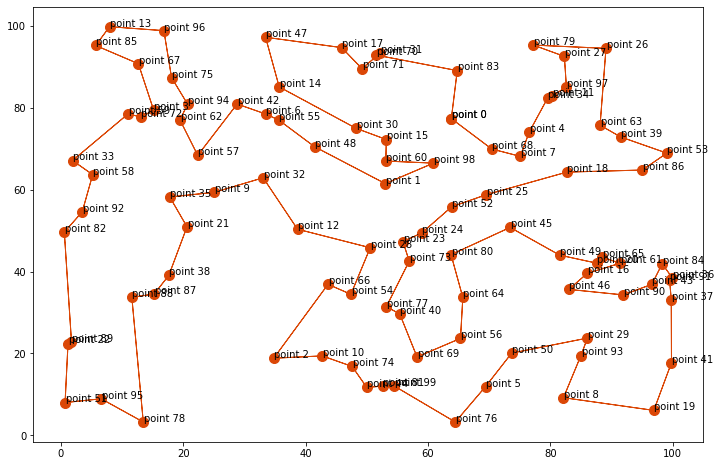

	Time for solution finding:	 20.22448205947876 



In [2]:
"""Simple Vehicles Routing Problem (VRP).
   This is a sample using the routing library python wrapper to solve a VRP
   problem.
   A description of the problem can be found here:
   http://en.wikipedia.org/wiki/Vehicle_routing_problem.
   Distances are in meters.
"""
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
def create_data_model():
    """Stores the data for the problem."""
    
    data = {}
    data['distance_matrix'] = maps_matrix
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data
    
start = time.time()
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    routes = {}
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route.append(node_index)
            plan_output += ' {} -> '.format(node_index)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        node_index = manager.IndexToNode(index)
        route.append(node_index)
        routes[f"Vehicle {vehicle_id}"] = route
#         routes.append(route)
        plan_output += '{}\n'.format(node_index)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('The shortest route distances: {}m'.format(max_route_distance))
    return routes

def visualize_function(points, routes_solution):
    plt.figure(figsize=(12, 8))
    print("="*100)
    print("ROAD MAP SOLUTION")
    for vehicle_id, (key, value) in enumerate(routes_solution.items()):
        if len(value) == 2: continue
#         print(f"Road map of {key}")
        color = np.random.rand(3,)
#         plt.figure(figsize=(8, 6))
        for i, point_id in enumerate(value):
            plt.scatter(points[point_id][0], points[point_id][1], color=[color], s=100)
            plt.annotate(f"point {point_id}", xy=(points[point_id][0]+0.1, points[point_id][1]+0.1))
        for i in range(len(value)-1):
            # get the starting point (A) and the end point (B) in the station_address
            start, end = value[i], value[i+1]
            # get the coordinate of the stating point (x1, y1) and the end point (x2, y2)
            point1, point2 = points[start], points[end]
            plt.arrow(point1[0], 
                      point1[1], 
                      point2[0] - point1[0], point2[1] - point1[1],
                      head_width=0.2,
                      head_length=0.2,
                      length_includes_head=True,
                      color=color)
#         print("=" * 100)
    plt.show()

def main(visualize=True):
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        routes_solution = print_solution(data, manager, routing, solution)
        if visualize == True:
            visualize_function(points, routes_solution)
        return routes_solution
    else:
        print('No solution found !')

if __name__ == '__main__':
    try:
        routes_solution = main()
    except:
        main()
end = time.time() 
print("\tTime for solution finding:\t", end-start, "\n")